In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
import sklearn.tree as tree
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score



In [2]:
milk = pd.read_csv('D:\FILE KULIAH\SEMESTER 4\DATMOD\milknew.csv')
milk


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


## PREPROCESSING

In [4]:
#missing value data1
missing_values_numeric = milk.select_dtypes(include='number').isna().sum()
print("Missing values for numeric columns:")
print(missing_values_numeric)


Missing values for numeric columns:
pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
dtype: int64


In [5]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter



# Menentukan fitur dan target
X = milk[['Odor', 'Fat ', 'pH', 'Taste', 'Temprature', 'Turbidity','Colour']]
y = milk['Grade']

# Stratified Shuffle Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Membagi dataset
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Melihat proporsi kelas dalam dataset asli dan dataset split
print("Original dataset distribution:", Counter(y))
print("Training set distribution:", Counter(y_train))
print("Testing set distribution:", Counter(y_test))

Milk_balance = pd.concat([X_train, y_train], axis=1)
Milk_balance = pd.concat([X_test, y_test], axis=1)

Original dataset distribution: Counter({'low': 429, 'medium': 374, 'high': 256})
Training set distribution: Counter({'low': 343, 'medium': 299, 'high': 205})
Testing set distribution: Counter({'low': 86, 'medium': 75, 'high': 51})


In [6]:
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk oversample kategori 'high'
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Memeriksa distribusi kelas setelah SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({'high': 429, 'low': 429, 'medium': 429})


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inisialisasi model RandomForest dengan menyetel class_weight ke "balanced"
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Melatih model
rf_classifier.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred = rf_classifier.predict(X_test)

# Menampilkan laporan klasifikasi
print("Classification Report (with balanced class weights):")
print(classification_report(y_test, y_pred))


Classification Report (with balanced class weights):
              precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       1.00      1.00      1.00        86
      medium       0.99      1.00      0.99        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



# **Visualisasi**

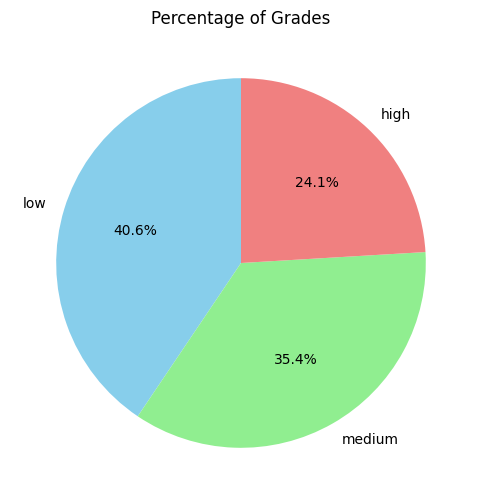

In [8]:

grades = Milk_balance['Grade']

# Count the occurrences of each grade
grade_counts = grades.value_counts()

# Plotting a pie chart
plt.figure(figsize=(7, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Percentage of Grades')
plt.show()


C:\Users\zxiper22\AppData\Local\Temp\ipykernel_6564\1080826665.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grade", y="Temprature", data=milk, palette="pastel")


<Axes: xlabel='Grade', ylabel='Temprature'>

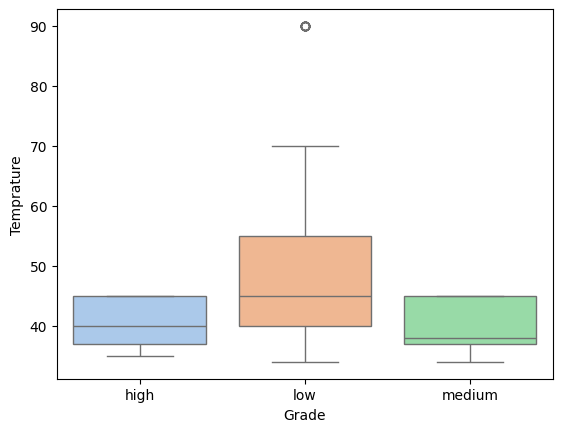

In [9]:
sns.boxplot(x="Grade", y="Temprature", data=milk, palette="pastel")

C:\Users\zxiper22\AppData\Local\Temp\ipykernel_6564\4068934404.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grade", y="pH", data=milk, palette="pastel")


<Axes: xlabel='Grade', ylabel='pH'>

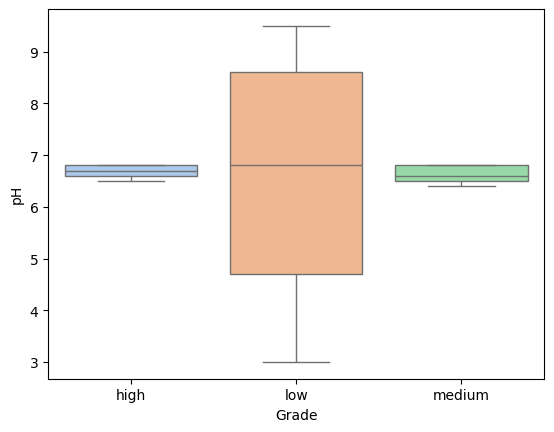

In [10]:
sns.boxplot(x="Grade", y="pH", data=milk, palette="pastel")

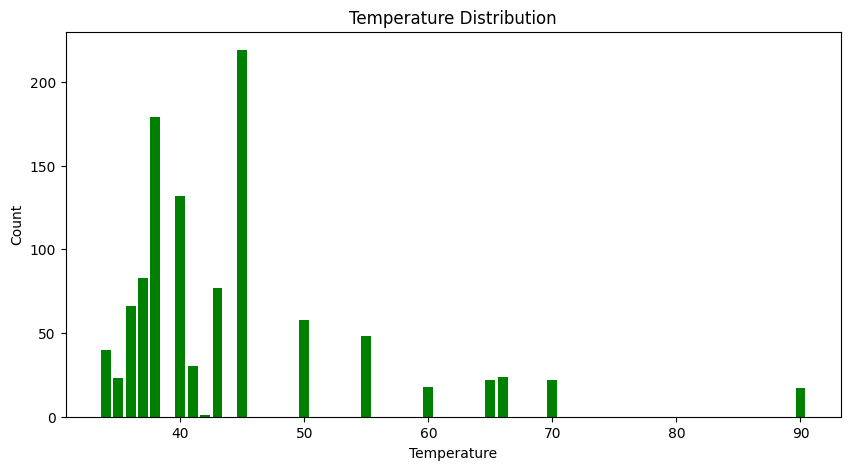

In [11]:
temperatures = milk['Temprature'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(temperatures.index, temperatures.values, color='green')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

# **Cek Korelasi**

In [12]:
Milk_balance[Milk_balance.isna().any(axis=1)]

,Odor,Fat,pH,Taste,Temprature,Turbidity,Colour,Grade


In [13]:
Milk_balance.isnull().sum

<bound method DataFrame.sum of        Odor   Fat      pH  Taste  Temprature  Turbidity  Colour  Grade
756   False  False  False  False       False      False   False  False
962   False  False  False  False       False      False   False  False
922   False  False  False  False       False      False   False  False
729   False  False  False  False       False      False   False  False
878   False  False  False  False       False      False   False  False
...     ...    ...    ...    ...         ...        ...     ...    ...
556   False  False  False  False       False      False   False  False
227   False  False  False  False       False      False   False  False
67    False  False  False  False       False      False   False  False
642   False  False  False  False       False      False   False  False
1001  False  False  False  False       False      False   False  False

[212 rows x 8 columns]>

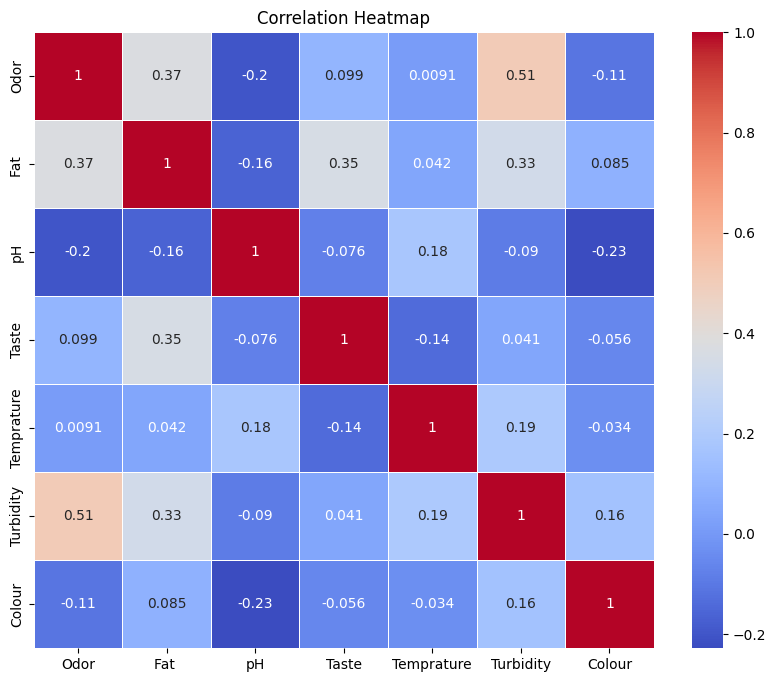

In [14]:

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(Milk_balance.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# **Decision tree**

In [15]:
X = Milk_balance[['Odor', 'Fat ', 'pH','Taste']].values
X[0:10]

array([[0. , 0. , 6.5, 0. ],
       [0. , 1. , 6.5, 1. ],
       [0. , 0. , 6.8, 0. ],
       [1. , 1. , 6.8, 1. ],
       [1. , 1. , 8.6, 0. ],
       [1. , 0. , 9.5, 1. ],
       [1. , 1. , 9. , 1. ],
       [1. , 0. , 6.7, 1. ],
       [1. , 1. , 5.6, 0. ],
       [1. , 1. , 6.5, 1. ]])

In [16]:
y = Milk_balance["Grade"]
y[0:10]

756     medium
962     medium
922     medium
729       high
878        low
1048       low
408        low
761     medium
940        low
1032      high
Name: Grade, dtype: object

In [17]:
# Menggunakan data menjadi data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model = DecisionTreeClassifier(max_depth = 4, random_state=42)

model.fit(X_train, y_train)

#prediksi
pred = model.predict(X_test)
print (pred [0:5])
print(y_test[0:5])

['low' 'medium' 'medium' 'high' 'medium']
280       low
178    medium
402    medium
805      high
4      medium
Name: Grade, dtype: object


Decision Tree Accuracy:  0.875
              precision    recall  f1-score   support

        high       0.71      0.83      0.77        12
         low       0.92      1.00      0.96        23
      medium       0.92      0.79      0.85        29

    accuracy                           0.88        64
   macro avg       0.85      0.88      0.86        64
weighted avg       0.88      0.88      0.87        64



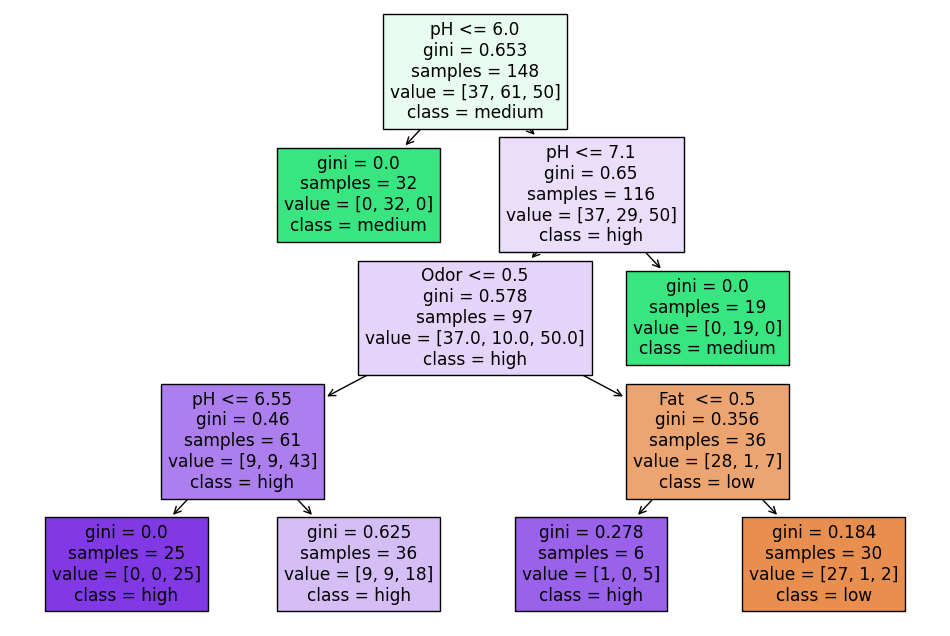

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

# Mengukur akurasi pada data Decision Tree Accuracy
print("Decision Tree Accuracy: ", metrics.accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Odor', 'Fat ', 'pH', 'Taste'], class_names=['low', 'medium', 'high'], filled=True)
plt.show()


## Confussion Matrix 

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix, without normalization
[[14  0  0]
 [ 0 23  2]
 [ 0  5 20]]
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        14
         low       0.82      0.92      0.87        25
      medium       0.91      0.80      0.85        25

    accuracy                           0.89        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.89      0.89      0.89        64



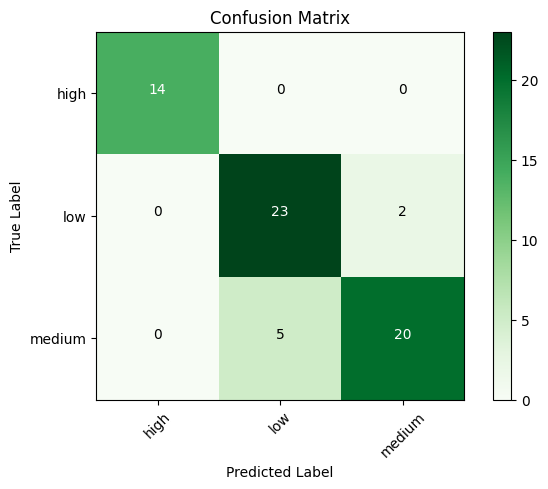

In [21]:


# Plot and visualize the confusion matrix
class_names = clf.classes_.astype(str)  # Convert class names to strings
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')

# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# **SVM**

In [22]:
Milk_balance

,Odor,Fat,pH,Taste,Temprature,Turbidity,Colour,Grade
756,0,0,6.5,0,37,0,255,medium
962,0,1,6.5,1,38,0,255,medium
922,0,0,6.8,0,41,0,255,medium
729,1,1,6.8,1,45,1,245,high
878,1,1,8.6,0,55,1,255,low
...,...,...,...,...,...,...,...,...
556,0,0,6.5,1,38,0,255,medium
227,1,1,6.6,0,45,1,250,high
67,0,0,6.5,1,38,0,255,medium
642,1,1,4.5,0,38,1,255,low


In [23]:
Milk_balance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 756 to 1001
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Odor        212 non-null    int64  
 1   Fat         212 non-null    int64  
 2   pH          212 non-null    float64
 3   Taste       212 non-null    int64  
 4   Temprature  212 non-null    int64  
 5   Turbidity   212 non-null    int64  
 6   Colour      212 non-null    int64  
 7   Grade       212 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 14.9+ KB


In [24]:
Milk_balance['Grade'] = Milk_balance['Grade'].replace('low', 0)
Milk_balance['Grade'] = Milk_balance['Grade'].replace('medium', 1)
Milk_balance['Grade'] = Milk_balance['Grade'].replace('high', 2)
Milk_balance.info()

# KOLOM "Temperature" : dalam 'C
# KOLOM "Taste"       : (0 = Bad) & (1 = Good)
# KOLOM "Odor"        : (0 = Bad) & (1 = Good)
# KOLOM "Fat"         : (0 = Low) & (1 = High)
# KOLOM "Turbidity"   : (0 = Low) & (1 = High) -> Cloudiness(keruh)
# KOLOM "Grade"       : (0 = Low), (1 = Medium), & (2 = High)

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 756 to 1001
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Odor        212 non-null    int64  
 1   Fat         212 non-null    int64  
 2   pH          212 non-null    float64
 3   Taste       212 non-null    int64  
 4   Temprature  212 non-null    int64  
 5   Turbidity   212 non-null    int64  
 6   Colour      212 non-null    int64  
 7   Grade       212 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 14.9 KB


C:\Users\zxiper22\AppData\Local\Temp\ipykernel_6564\2652839624.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Milk_balance['Grade'] = Milk_balance['Grade'].replace('high', 2)


In [25]:
X = Milk_balance[['Odor', 'Fat ', 'pH','Taste']].values
X[0:10]

array([[0. , 0. , 6.5, 0. ],
       [0. , 1. , 6.5, 1. ],
       [0. , 0. , 6.8, 0. ],
       [1. , 1. , 6.8, 1. ],
       [1. , 1. , 8.6, 0. ],
       [1. , 0. , 9.5, 1. ],
       [1. , 1. , 9. , 1. ],
       [1. , 0. , 6.7, 1. ],
       [1. , 1. , 5.6, 0. ],
       [1. , 1. , 6.5, 1. ]])

In [26]:
y = Milk_balance["Grade"]
y[0:10]

756     1
962     1
922     1
729     2
878     0
1048    0
408     0
761     1
940     0
1032    2
Name: Grade, dtype: int64

In [27]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
data2 = svm.SVC(kernel='sigmoid')
data2.fit(X_trains, y_trains)


SVC(kernel='sigmoid')

In [29]:
yhat = data2.predict(X_tests)
yhat [0:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [30]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

SVM Accuracy:  0.53125
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        25
           1       0.55      0.92      0.69        25
           2       0.00      0.00      0.00        14

    accuracy                           0.53        64
   macro avg       0.35      0.45      0.38        64
weighted avg       0.41      0.53      0.45        64

Confusion Matrix, without normalization
[[11 14  0]
 [ 2 23  0]
 [ 9  5  0]]


C:\Users\zxiper22\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zxiper22\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zxiper22\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

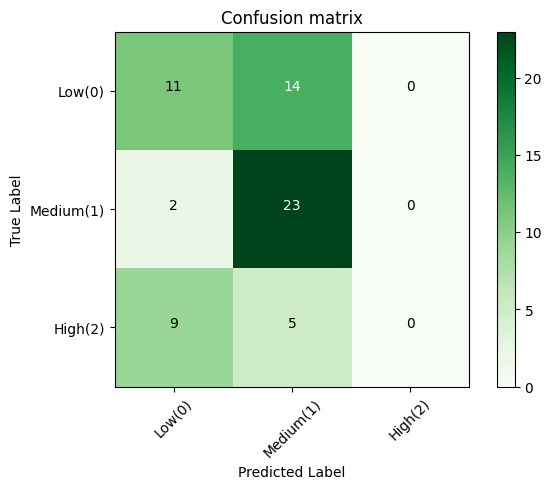

In [31]:
cnf_matrix = confusion_matrix(y_tests, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

print("SVM Accuracy: ", metrics.accuracy_score(y_tests, yhat))
print(classification_report(y_tests, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low(0)', 'Medium(1)', 'High(2)'],
                     normalize=False, title='Confusion matrix')